## REGRESSION ANALYSIS - MDS232
### CIA 1 - SIMPLE LINEAR REGRESSION
*Submitted by Royce Rose K R, Reg no: 2248052*

### TO STUDY THE INFLUENCE OF *CGPA* IN THE *CHANCE OF ADMISSION* OF A STUDENT INTO THE UNIVERSITY


#### DATA SET DESCRIPTION

This dataset includes various information like GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research and chance of admit. In this dataset, 400 entries are included.

GRE Scores ( out of 340 ),
TOEFL Scores ( out of 120 ),
University Rating ( out of 5 ),
Statement of Purpose (SOP) and Letter of Recommendation (LOR) Strength ( out of 5 )
Undergraduate GPA ( out of 10 ),
Research Experience ( either 0 or 1 ),
Chance of Admit ( ranging from 0 to 1 ).

#### SOURCE: 
https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

### 1.Simple Linear Regression

It is a statistical method that helps us to summarize and study the relationship between a dependent and an independent variable. The independent variable is the data which can controlled directly whereas the dependent variable cannot be controlled directly. 

### 2.Objective

To study the extent to which CGPA influences the chance of admission of a student into the particular university. Here, the dependent variable considered is *Chance of Admission* and the independent variable is *CGPA*.

### 3.Data Preparation

#### 3.1.Importing Data

In [11]:
'''Here we are importing the necessary libraries such as numpy and pandas to manipulate the data
   Where matplotlib and seaborm are used in visualization.
'''
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [2]:
#Here we are importing the data using pandas.

data = pd.read_csv("E:\\SEMESTER 2\\DATA\\adm_data.csv")

In [3]:
# Here we are viewing the data set.
data 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
# Here, the dimension of the data can be viewed
data.shape

(400, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   ChanceofAdmit      400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


Using *info()* function, we can get all the information of the data set. We can see that the data we got is of mainly two types int64 and float64. And we can also see that there is no *Null* values in the data set.

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


The descriptive measures of the data set is obtained using *describe()* function.

<AxesSubplot:>

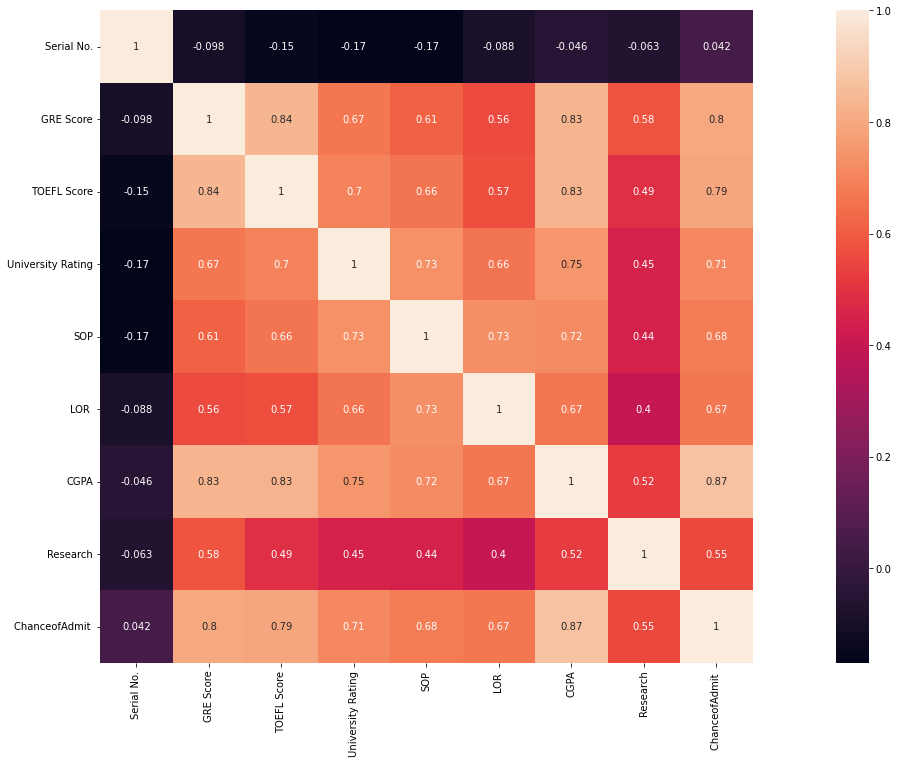

In [7]:
## Plotting correaltion matrix

corr_mat=data.corr()
mask=np.array(corr_mat)
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=corr_mat,annot=True,cbar=True,square=True)

From the correlation matrix we can see the correlation between various variables of the data set. Here, we can see that there is a postive correlation between the *CGPA* and *Chance of Admission*.

Therefore, we are trying to built a simple linear regression model by taking *CGPA* as the independent variable and *Chance of Admission* as the dependent variable.


In [8]:
# Here, we are extracting the CGPA from the data set- independent variable
x = data['CGPA']

#Here, we are converting the data type of CGPA into float so as to avoid further complications
X = x.astype('float64')

In [9]:
# Here, we are extracting the chance of admission from the data set using the iloc function - dependent variable
Y = data.iloc[:,8]

#### 3.2.Exploratory Data Analysis

EDA is performed so as it helps to analyze the data before coming into assumption. It helps in the identification of errors and understanding the data set in a better way.

In [45]:
#importing the warnings library so as to avoid warnings
import warnings
warnings.simplefilter("ignore")

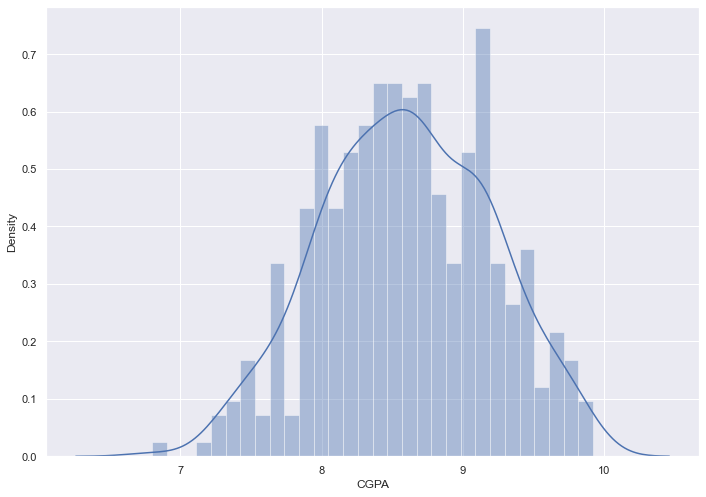

In [46]:
#Plotting the distribution of independent variable- CGPA

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(X, bins=30)
plt.show()

In [47]:
#Measuring the skewness
X.skew()

-0.06599054377889167

In [48]:
#Taking the mean
X.mean()

8.598924999999998

In [49]:
#Taking the median
X.median()

8.61

As we can see that Mean < Median, the independent variable has a distribution which is left-skewed with a skewness of -0.065. Since the skewness is very small, ~0, a distribution plot shows an almost normal distribution.

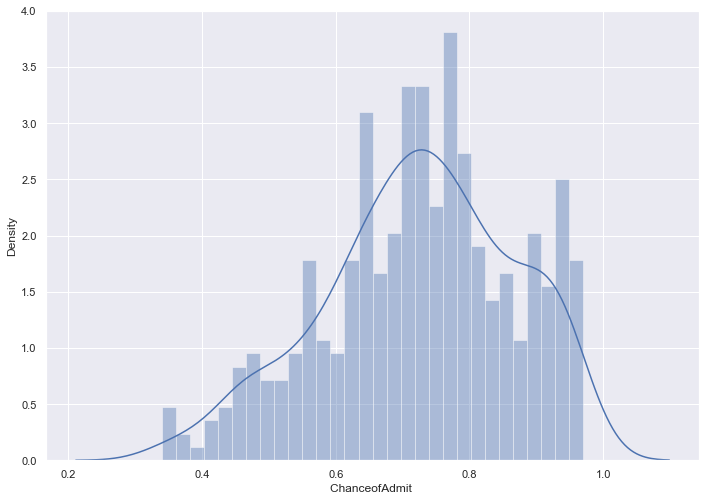

In [50]:
#Plotting the distribution of dependent variable- Chance of Admission

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()

In [51]:
#Measuring the skewness
Y.skew()

-0.3534480999327828

In [52]:
#Taking the mean
Y.mean()

0.7243499999999996

In [53]:
#Taking the median
Y.median()

0.73

As we can see that Mean < Median, the dependent variable has a distribution which is left-skewed with a skewness of -0.35. Since the skewness is very small, ~0, a distribution plot shows an almost normal distribution

Text(0.5, 1.0, 'Scatter Plot')

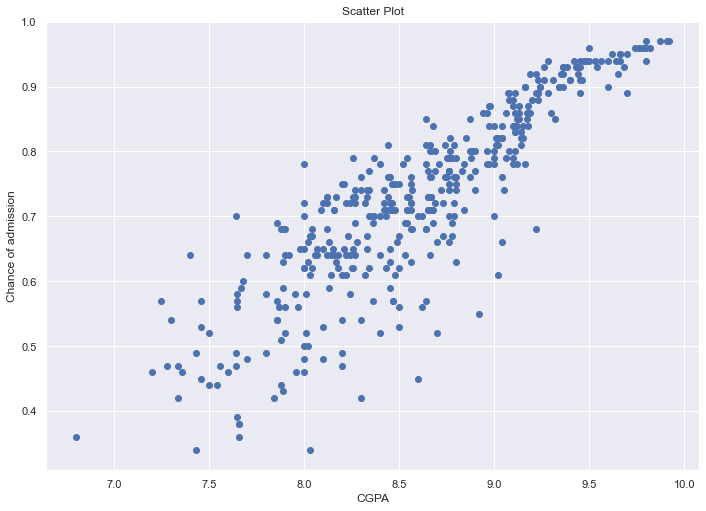

In [54]:
# Plotting the scatter plot

plt.scatter(X,Y, marker ='o')
plt.xlabel('CGPA')
plt.ylabel('Chance of admission')
plt.title('Scatter Plot')

Here, we can see that the data points are almost linear in nature. And there exists a positive correlation between the variables as stated earlier.

<AxesSubplot:xlabel='CGPA'>

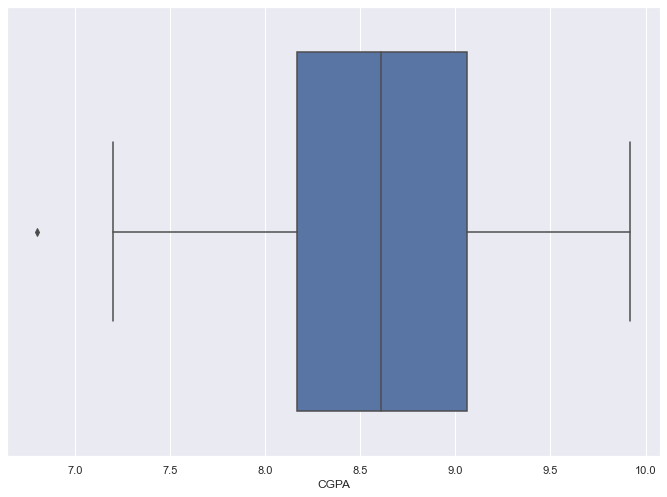

In [55]:
#Plotting the boxplot 

#The boxplot corresponds to the independent variable-CGPA
sns.boxplot(X)

Here, we can see that there is an exisitence of a single outlier. This point corresponds to the lowest *CGPA* score.

<AxesSubplot:xlabel='ChanceofAdmit '>

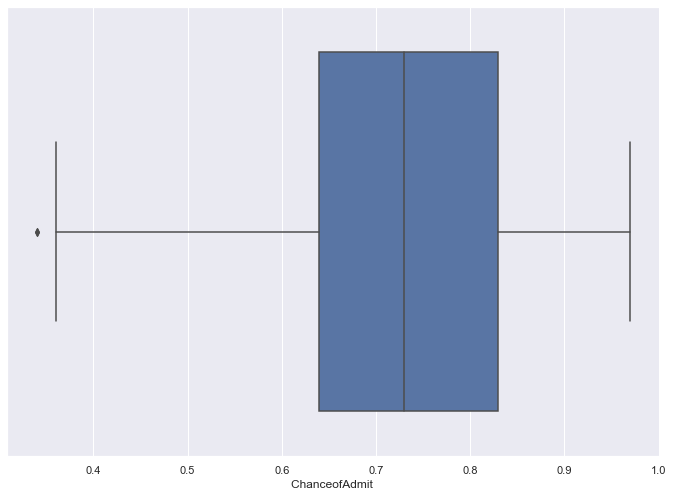

In [56]:
#The boxplot corresponds to the dependent variable - chance of admission
sns.boxplot(Y)

Here, we can see that there is an exisitence of single outlier. This point corresponds to the lowest *Chance of admission*.

Since, the outliers are minimum; its less likely to affect the model.

#### 3.2.Creating train and test data

Here, we are splitting the data into the training and testing data sets. We split the data set such as 80% of the data is used in training the model and the rest 20% is hidden from the model, for testing the model.

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y, train_size = 0.8,test_size= 0.2, random_state = 10)#random_state=np.random can be used for making␣,random sets

In [58]:
x_train

303    8.55
349    8.04
149    8.26
100    8.46
175    8.87
       ... 
369    8.03
320    8.50
15     8.30
125    8.66
265    8.68
Name: CGPA, Length: 320, dtype: float64

In [59]:
y_train

303    0.73
349    0.62
149    0.79
100    0.71
175    0.85
       ... 
369    0.67
320    0.75
15     0.54
125    0.64
265    0.71
Name: ChanceofAdmit , Length: 320, dtype: float64

### 4. Model Building
There are many libraries used to build the linear regression model in python. Here we are using statsmodels.

In [60]:
import statsmodels.api as lm
x_train_lm=lm.add_constant(x_train)

In [61]:
model=lm.OLS(y_train,x_train_lm).fit()

In [62]:
# Here, we print the parameter estimates
model.params 

const   -1.093405
CGPA     0.211488
dtype: float64

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ChanceofAdmit    R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1100.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          3.01e-105
Time:                        13:12:37   Log-Likelihood:                 404.52
No. Observations:                 320   AIC:                            -805.0
Df Residuals:                     318   BIC:                            -797.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0934      0.055    -19.923      0.000      -1.201      -0.985
CGPA           0.2115      0.006     33.165      0.000       0.199       0.224
==============================================================================
Omnibus:                       50.682   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.658
Skew:                          -0.942   Prob(JB):                     3.06e-18
Kurtosis:                       4.582   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The summary of the model is obtained using the function *summary()*.

An R- square result which range from 0.70 to 1.00 indicates that the model explains the output well. Here, the adjusted value is 0.775, which means that 77.5% of the *Chance of admission* is explained by the variable *CGPA*. Durbin-Watson test is to check the autocorrelation (correlation of error terms). No autocorrelation is implied by a value of 2, below 2 is positive correlation and above 2 is negative correlation. Here, we can see it is below 2, which indicates positive correlation.

#### Visualizing the fitted line to the train data

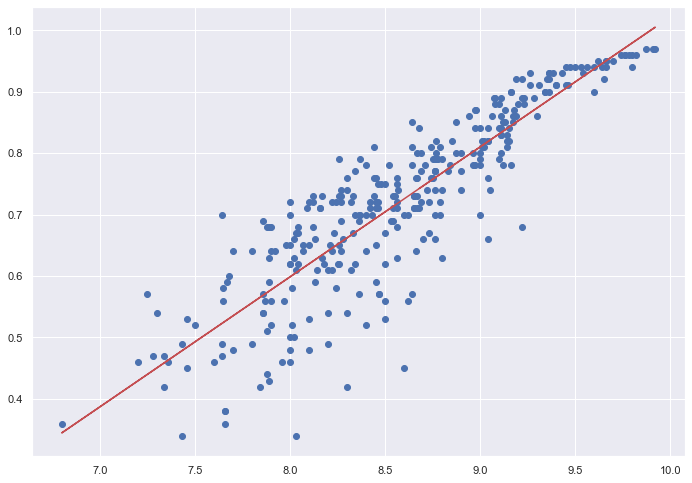

In [64]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.plot(x_train, -1.0934 + 0.2115*x_train, 'r')
plt.show()

Here, the redline is the fitted regression line (*Chance of admission* = -1.0934 + 0.2115*CGPA*) for the training data.

#### Prediction using test data set

In [65]:
x_test_lm = lm.add_constant(x_test)
y_test_pred = model.predict(x_test_lm)
y_test_pred

332    0.642907
111    0.742306
352    0.611184
205    0.524474
56     0.471602
         ...   
304    0.689435
187    0.903037
166    0.668286
64     0.746536
27     0.492751
Length: 80, dtype: float64

In [66]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7000956087636854

Here, we can say that the 70% of the *Chance of admission* is explained by the variable *CGPA* in the test data set.

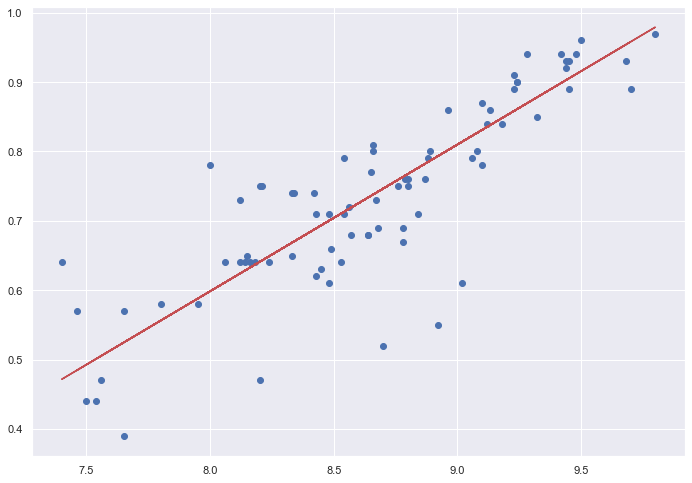

In [67]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

Here, the redline is the fitted line for the test data set.

### 5. CONCLUSION

It was found that the R- square value for the train data was 0.776 and R- square value of the test data was 0.70. 
Therefore, we can see that around 70% of chance of getting admission into the univeristy depends on CGPA score and the rest depends on other factors like SOP, researches done etc. We can say that CGPA has considerable influence in getting admission into the university. Also, the students should be encouraged to be involved in other extra-curricular activities so as to improve their soft skills and thereby increase the chance of getting admitted.
